In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [83]:
mortalidad = pd.read_csv('mortalidad.csv')

In [84]:
mortalidad

,gru_edad,sexo,ano,diagnostico1,nombre_enfermedad,n,total
0,00-04,Mujer,1997,C679,Tumor maligno de la vejiga urinaria,1,687170
1,00-04,Mujer,1997,C749,Tumor maligno de la tiroides y otras glándulas...,1,687170
2,00-04,Mujer,1997,C910,Leucemia,1,687170
3,00-04,Mujer,1997,C920,Leucemia,5,687170
4,00-04,Mujer,1997,C950,Leucemia,1,687170
...,...,...,...,...,...,...,...
73016,85 +,Hombre,2019,K769,Ciertas enfermedades crónicas del hígado y cir...,39,85219
73017,85 +,Hombre,2019,N183,Enfermedad renal crónica,4,85219
73018,85 +,Hombre,2019,N184,Enfermedad renal crónica,11,85219
73019,85 +,Hombre,2019,N185,Enfermedad renal crónica,62,85219


In [85]:
# 1. Información básica del DataFrame
print("Información general del DataFrame:")
print(mortalidad.info())

# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(mortalidad.describe())

# 3. Identificar valores nulos
print("\nCantidad de valores nulos por columna:")
print(mortalidad.isnull().sum())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73021 entries, 0 to 73020
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gru_edad           73021 non-null  object
 1   sexo               73021 non-null  object
 2   ano                73021 non-null  int64 
 3   diagnostico1       73021 non-null  object
 4   nombre_enfermedad  73021 non-null  object
 5   n                  73021 non-null  int64 
 6   total              73021 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.9+ MB
None

Estadísticas descriptivas:
                ano             n          total
count  73021.000000  73021.000000   73021.000000
mean    2008.215116     16.546870  331342.769601
std        6.655461     48.793603  211147.897053
min     1997.000000      1.000000   23592.000000
25%     2002.000000      1.000000  149208.000000
50%     2008.000000      3.000000  274230.000000
75%     

In [86]:
# 6. Identificar y eliminar filas duplicadas
duplicados = mortalidad.duplicated().sum()
print(f"\nFilas duplicadas encontradas: {duplicados}")


Filas duplicadas encontradas: 0


In [87]:
# 7. Verificar valores atípicos (outliers) con el rango intercuartílico (IQR)
for col in mortalidad.select_dtypes(include=['float64', 'int64']):
    Q1 = mortalidad[col].quantile(0.25)
    Q3 = mortalidad[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = mortalidad[(mortalidad[col] < lower_bound) | (mortalidad[col] > upper_bound)]
    print(f"\nValores atípicos en '{col}': {len(outliers)}")


Valores atípicos en 'ano': 0

Valores atípicos en 'n': 10570

Valores atípicos en 'total': 0


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

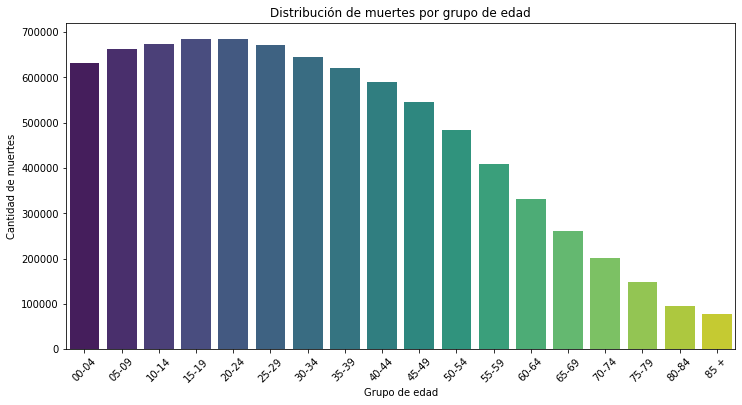

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(data=mortalidad, x='gru_edad', y='total', hue='gru_edad', errorbar=None, palette='viridis', legend=False)


plt.xticks(rotation=45)
plt.title('Distribución de muertes por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de muertes')
plt.show()


In [90]:
# Agrupar por gru_edad y sumar los valores de 'total'
df_grouped = mortalidad.groupby('gru_edad')['total'].sum().reset_index()

# Convertir los datos a formato JSON para Chart.js
data_for_chartjs = {
    "labels": df_grouped['gru_edad'].tolist(),
    "datasets": [{
        "label": "Total Mortalidad",
        "data": df_grouped['total'].tolist(),
        "backgroundColor": "rgba(75, 192, 192, 0.2)",
        "borderColor": "rgba(75, 192, 192, 1)",
        "borderWidth": 1
    }]
}

# Guardar en un archivo JSON
file_path = "datos/mortalidad_grouped_data.json"
with open(file_path, 'w') as json_file:
    json.dump(data_for_chartjs, json_file)

file_path

'datos/mortalidad_grouped_data.json'

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


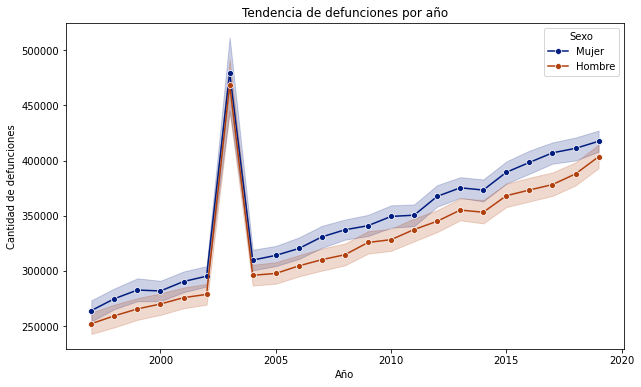

In [92]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=mortalidad, x='ano', y='total', hue='sexo', marker='o', palette='dark')
plt.title('Tendencia de defunciones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de defunciones')
plt.legend(title='Sexo')
plt.show()


In [98]:

# Agrupar por 'ano' y 'sexo', sumando 'total'
df_grouped = mortalidad.groupby(['ano', 'sexo'])['total'].sum().reset_index()

# Crear el formato adecuado para Chart.js
chart_data = {
    "labels": df_grouped['ano'].unique().tolist(),  # Años como etiquetas en el eje X
    "datasets": []
}

# Crear los datasets para cada sexo
for sexo in df_grouped['sexo'].unique():
    dataset = {
        "label": sexo,
        "data": df_grouped[df_grouped['sexo'] == sexo]['total'].tolist(),
        "fill": False,  # No llenar el área debajo de la línea
        "borderColor": "rgba(75, 192, 192, 1)" if sexo == 'Mujer' else "rgba(255, 99, 132, 1)",  # Diferentes colores por sexo
        "tension": 0.4,  # Para suavizar la línea
        "borderWidth": 2,
        "pointStyle": 'circle',  # Usar círculos como marcadores
        "pointRadius": 5,  # Tamaño de los puntos
        "pointBackgroundColor": "rgba(75, 192, 192, 1)" if sexo == 'Mujer' else "rgba(255, 99, 132, 1)"  # Colores de los puntos
    }
    chart_data["datasets"].append(dataset)

# Guardar el archivo JSON
json_file_path = 'datos/defunciones_sexo_ano.json'
with open(json_file_path, 'w') as json_file:
    json.dump(chart_data, json_file)

json_file_path

'datos/defunciones_sexo_ano.json'

<ipython-input-18-820d99e53327>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mortalidad, x='gru_edad', y='n', ci=None, palette='viridis')
<ipython-input-18-820d99e53327>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mortalidad, x='gru_edad', y='n', ci=None, palette='viridis')


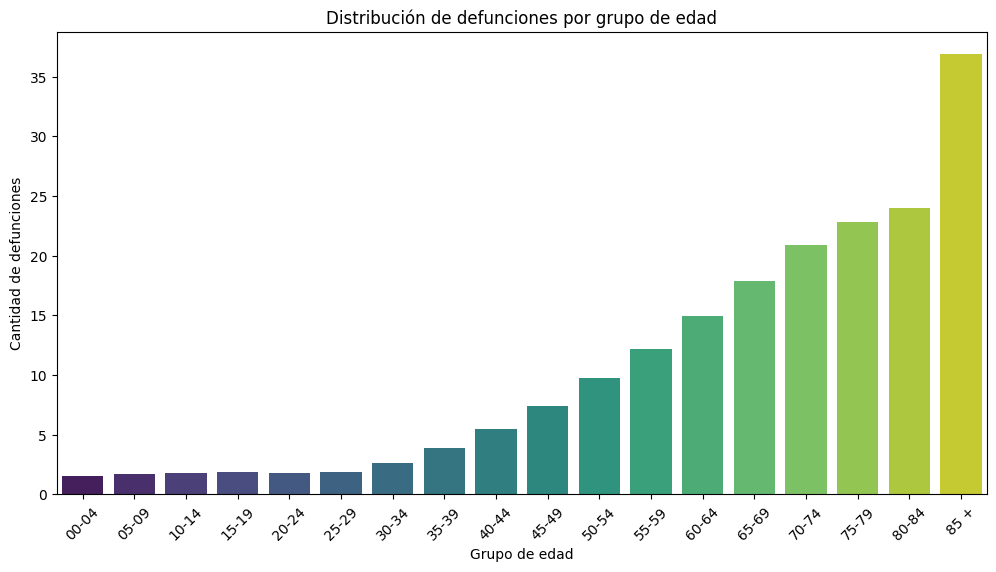

<ipython-input-18-820d99e53327>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mortalidad, x='sexo', y='n', ci=None, palette='pastel')
<ipython-input-18-820d99e53327>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mortalidad, x='sexo', y='n', ci=None, palette='pastel')


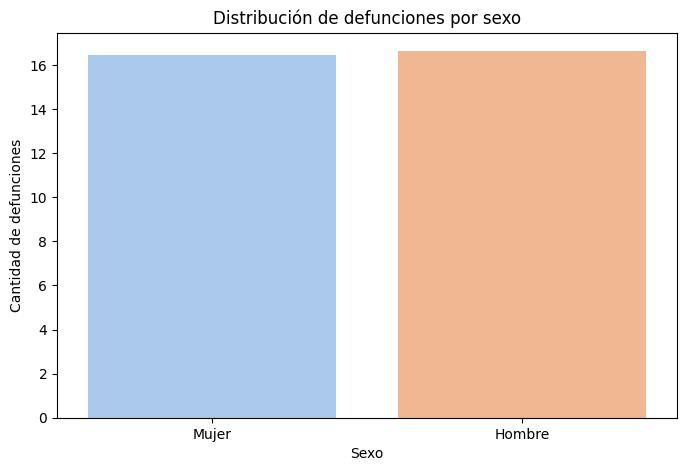

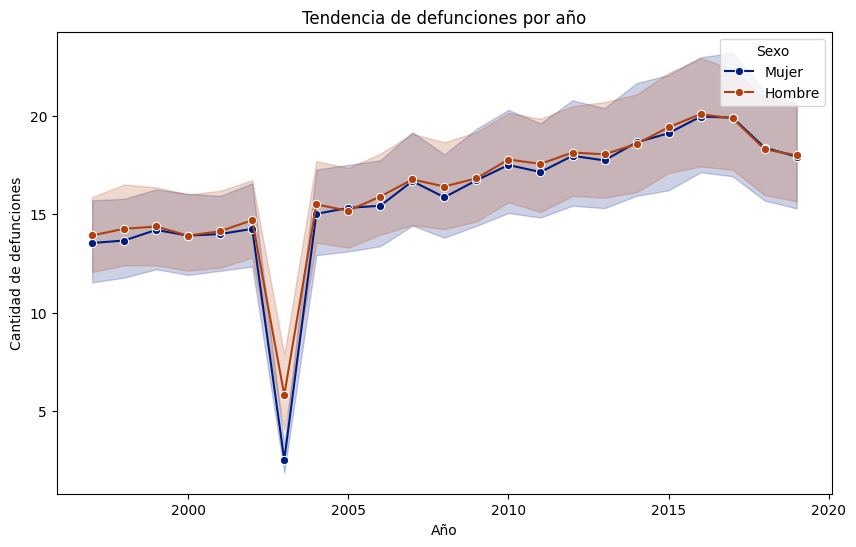

<ipython-input-18-820d99e53327>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_enfermedades, x='nombre_enfermedad', y='n', palette='rocket')


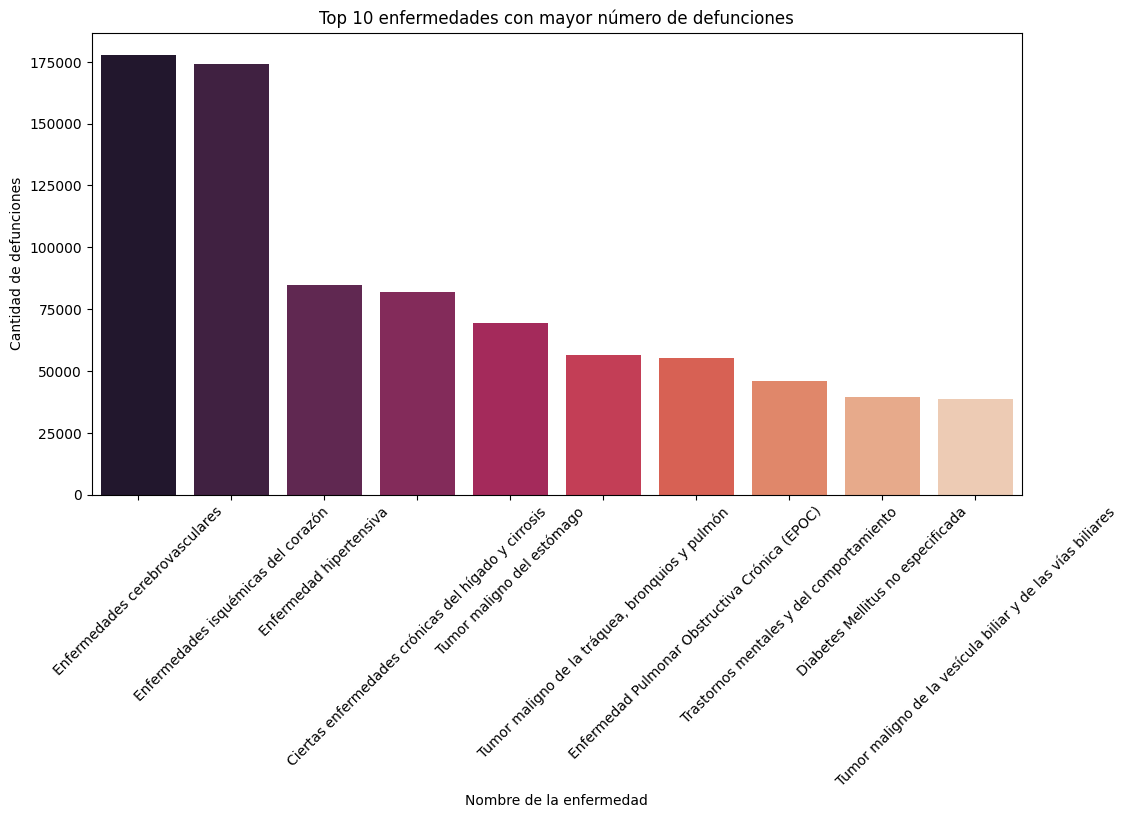

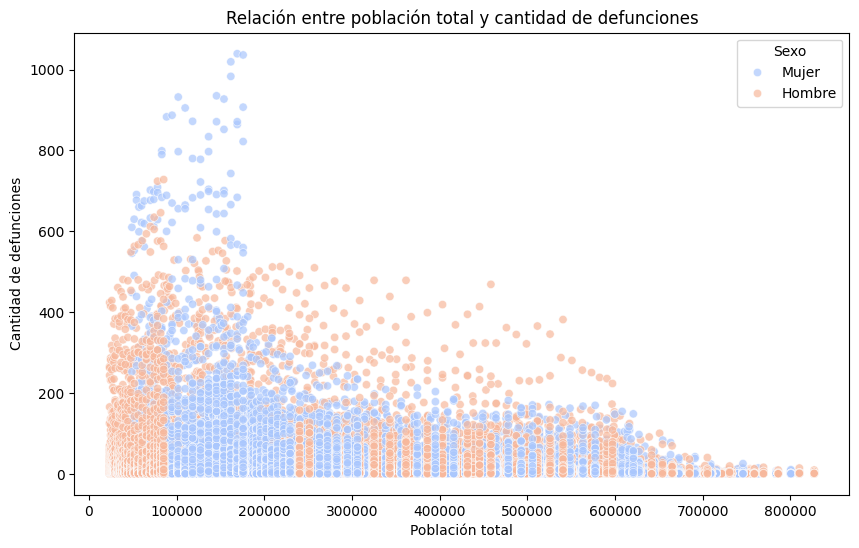

In [ ]:
# 1. Distribución de defunciones por grupo de edad
plt.figure(figsize=(12, 6))
sns.barplot(data=mortalidad, x='gru_edad', y='n', ci=None, palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribución de defunciones por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad de defunciones')
plt.show()

# 2. Distribución de defunciones por sexo
plt.figure(figsize=(8, 5))
sns.barplot(data=mortalidad, x='sexo', y='n', ci=None, palette='pastel')
plt.title('Distribución de defunciones por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de defunciones')
plt.show()

# 3. Tendencia de defunciones a lo largo de los años
plt.figure(figsize=(10, 6))
sns.lineplot(data=mortalidad, x='ano', y='n', hue='sexo', marker='o', palette='dark')
plt.title('Tendencia de defunciones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de defunciones')
plt.legend(title='Sexo')
plt.show()

# 4. Cantidad de defunciones por enfermedad
top_enfermedades = mortalidad.groupby('nombre_enfermedad')['n'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_enfermedades, x='nombre_enfermedad', y='n', palette='rocket')
plt.xticks(rotation=45)
plt.title('Top 10 enfermedades con mayor número de defunciones')
plt.xlabel('Nombre de la enfermedad')
plt.ylabel('Cantidad de defunciones')
plt.show()

# 5. Relación entre población total y cantidad de defunciones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mortalidad, x='total', y='n', hue='sexo', alpha=0.7, palette='coolwarm')
plt.title('Relación entre población total y cantidad de defunciones')
plt.xlabel('Población total')
plt.ylabel('Cantidad de defunciones')
plt.legend(title='Sexo')
plt.show()

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

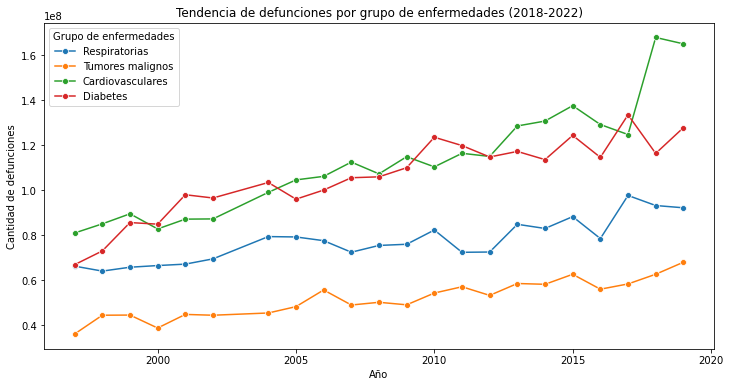

In [99]:
# 2. Tendencia temporal por grupo de enfermedades
grupos_enfermedades = {
    'Respiratorias': [
        'Enfermedad Pulmonar Obstructiva Crónica (EPOC)',
        'Enfermedades crónicas de las vías respiratorias inferiores',
        'Enfermedad cardiopulmonar y de la circulación pulmonar'
    ],
    'Tumores malignos': [
        'Tumor maligno del hígado', 'Tumor maligno del estómago',
        'Tumor maligno del pulmón', 'Tumor maligno de la mama de la mujer'
    ],
    'Cardiovasculares': [
        'Paro cardiaco', 'Enfermedades isquémicas del corazón',
        'Insuficiencia cardíaca', 'Aneurisma aórtico'
    ],
    'Diabetes': [
        'Diabetes Mellitus no especificada', 'Diabetes insulinodependiente',
        'Diabetes no insulinodependiente'
    ]
}

# Crear DataFrame para la tendencia temporal
tendencia = []
for grupo, enfermedades in grupos_enfermedades.items():
    datos_grupo = mortalidad[mortalidad["nombre_enfermedad"].isin(enfermedades)]
    suma_anual = datos_grupo.groupby("ano")["total"].sum().reset_index()
    suma_anual["grupo"] = grupo
    tendencia.append(suma_anual)

tendencia_df = pd.concat(tendencia)

plt.figure(figsize=(12, 6))
sns.lineplot(data=tendencia_df, x="ano", y="total", hue="grupo", marker="o")
plt.title("Tendencia de defunciones por grupo de enfermedades (2018-2022)")
plt.xlabel("Año")
plt.ylabel("Cantidad de defunciones")
plt.legend(title="Grupo de enfermedades")
plt.show()

In [106]:
import numpy as np
# Crear el DataFrame ejemplo (puedes reemplazarlo por tu DataFrame real)
grupos_enfermedades = {
    'Respiratorias': [
        'Enfermedad Pulmonar Obstructiva Crónica (EPOC)',
        'Enfermedades crónicas de las vías respiratorias inferiores',
        'Enfermedad cardiopulmonar y de la circulación pulmonar'
    ],
    'Tumores malignos': [
        'Tumor maligno del hígado', 'Tumor maligno del estómago',
        'Tumor maligno del pulmón', 'Tumor maligno de la mama de la mujer'
    ],
    'Cardiovasculares': [
        'Paro cardiaco', 'Enfermedades isquémicas del corazón',
        'Insuficiencia cardíaca', 'Aneurisma aórtico'
    ],
    'Diabetes': [
        'Diabetes Mellitus no especificada', 'Diabetes insulinodependiente',
        'Diabetes no insulinodependiente'
    ]
}

# Crear DataFrame para la tendencia temporal
tendencia = []
for grupo, enfermedades in grupos_enfermedades.items():
    datos_grupo = mortalidad[mortalidad["nombre_enfermedad"].isin(enfermedades)]
    suma_anual = datos_grupo.groupby("ano")["total"].sum().reset_index()
    suma_anual["grupo"] = grupo
    tendencia.append(suma_anual)

tendencia_df = pd.concat(tendencia)

# Crear el diccionario para Chart.js
chart_data = {
    "labels": sorted(tendencia_df["ano"].unique().tolist()),
    "datasets": []
}

# Generar los datasets para cada grupo de enfermedades
for grupo in tendencia_df["grupo"].unique():
    group_data = tendencia_df[tendencia_df["grupo"] == grupo]
    dataset = {
        "label": grupo,
        "data": group_data["total"].tolist(),
        "borderColor": "#"+''.join([f'{hex(x)[2:].zfill(2)}' for x in np.random.randint(0, 256, 3)]),
        "backgroundColor": "rgba(0, 123, 255, 0.2)",
        "fill": False,
        "lineTension": 0.1,
        "pointRadius": 5
    }
    chart_data["datasets"].append(dataset)

# Guardar el JSON en un archivo
with open('datos/tendencia_grupos_enfermedades.json', 'w') as json_file:
    json.dump(chart_data, json_file, indent=4)
